This is needed to reload modules without restarting the kernel

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Line above avoids running on GPU

In [2]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [3]:
import os
os.sys.path.append('../../')

# TSNE Exploration

Lets try some tsne embedding to try and understand a little bit about the data

In [4]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root

-rw-r--r-- 1 lborgna users 421M Apr 14 11:06 /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root


In [5]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.1.0'

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import  BatchNormalization


In [45]:
import seaborn as sns

In [9]:
import shap

In [10]:
file_path='/mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root'

In [11]:
f = uproot.open(file_path)

In [12]:
f.keys()

[b'control;1', b'validation;1', b'sig;1']

In [13]:
from hh4b_utils.nnt_tools import load_nnt

In [14]:
df = load_nnt(file_path)

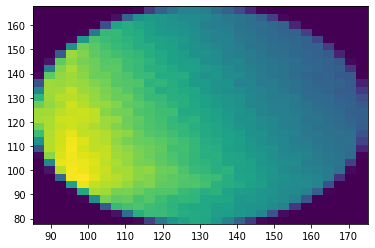

In [15]:
_=plt.hist2d(df.m_h1.values, df.m_h2.values, bins=(30, 30))

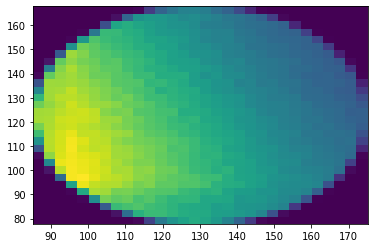

In [16]:
_=plt.hist2d(df.loc[df['ntag']==2,'m_h1'].values, df.loc[df['ntag']==2, 'm_h2'].values, bins=(30, 30))

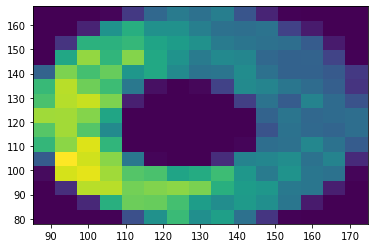

In [17]:
_=plt.hist2d(df.loc[df['ntag']>=4,'m_h1'].values, df.loc[df['ntag']>=4, 'm_h2'].values, bins=(15, 15))

In [18]:
df['HighMass'] = df['m_hh'] > 350

In [19]:
from sklearn.manifold import TSNE

In [20]:
df.columns

Index(['run_number', 'event_number', 'pass_vbf_sel', 'mc_sf', 'trig_sf',
       'jet_trig_sfs', 'truth_mhh', 'ntag', 'njets', 'kinematic_region',
       'm_min_dj', 'm_max_dj', 'pairing_score_1', 'pairing_score_2',
       'bkt_lead_jet_pt', 'bkt_third_lead_jet_pt', 'bkt_HT', 'bucket_passed',
       'cos_theta_star', 'm_hh_cor', 'm_hh', 'pt_hh', 'dEta_hh', 'X_wt_tag',
       'X_wt_notag', 'X_wt_nonHCWjets', 'trig_bucket', 'm_h1', 'E_h1', 'pT_h1',
       'eta_h1', 'phi_h1', 'm_h2', 'E_h2', 'pT_h2', 'eta_h2', 'phi_h2',
       'm_h1_j1', 'E_h1_j1', 'pT_h1_j1', 'eta_h1_j1', 'phi_h1_j1', 'tag_h1_j1',
       'quantile_h1_j1', 'angle_h1_j1', 'm_h1_j2', 'E_h1_j2', 'pT_h1_j2',
       'eta_h1_j2', 'phi_h1_j2', 'tag_h1_j2', 'quantile_h1_j2', 'angle_h1_j2',
       'm_h2_j1', 'E_h2_j1', 'pT_h2_j1', 'eta_h2_j1', 'phi_h2_j1', 'tag_h2_j1',
       'quantile_h2_j1', 'angle_h2_j1', 'm_h2_j2', 'E_h2_j2', 'pT_h2_j2',
       'eta_h2_j2', 'phi_h2_j2', 'tag_h2_j2', 'quantile_h2_j2', 'angle_h2_j2',
       'pT_4

In [21]:
cols = [
    "ntag",
    "njets",
    "bkt_HT",
    "cos_theta_star",
    "m_hh",
    "pt_hh",
    "dEta_hh",
    "X_wt_tag",
    "m_h1",
    "m_h2",
    'pT_h1_j1',
    'pT_h1_j2',
    'pT_h2_j1',
    'pT_h2_j2',
    "dRjj_1",
    "dRjj_2",
    "eta_i",
    "pT_2",
    "pT_4",
]

In [22]:
df_cr = df.loc[df['kinematic_region']==2].reset_index(drop=True)

In [23]:
X_embedded = TSNE(n_components=2).fit_transform(df_cr[cols].values)

In [24]:
X_embedded

array([[-3.2864436e-06, -7.5302341e-06],
       [-8.4725289e-06, -5.3219869e-06],
       [-1.8001962e-05,  1.5076761e-06],
       ...,
       [ 7.2091240e-07,  1.8901234e-06],
       [-4.5220676e-07,  7.1453533e-06],
       [-2.9065056e-06, -1.4366864e-05]], dtype=float32)

In [26]:
(df_cr['HighMass'] > 350).values

array([False, False, False, ..., False, False, False])

In [30]:
X_embedded.shape

(1036221, 2)

In [31]:
df_cr.shape

(1036221, 90)

In [34]:
X_embedded[:,0].shape

(1036221,)

In [35]:
df_cr['t1'] = X_embedded[:, 0]
df_cr['t2'] = X_embedded[:, 1]

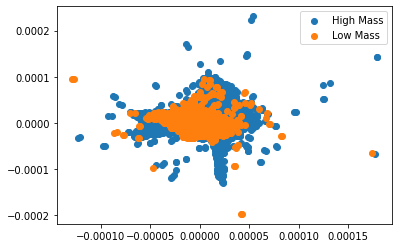

In [41]:
plt.scatter(
    X_embedded[(df_cr["m_hh"] >=350).values][:,0],
    X_embedded[(df_cr["m_hh"] >=350).values][:,1],
    label = 'High Mass'
)
plt.scatter(
    X_embedded[(df_cr["m_hh"] <350).values][:,0],
    X_embedded[(df_cr["m_hh"] <350).values][:,1],
    label = 'Low Mass'
)
plt.legend()

In [42]:
df_cr['Tag'] = 0

In [43]:
df_cr.loc[(df_cr['ntag']==2) & (df_cr['m_hh']<350), 'Tag'] = '2b - Low Mass'
df_cr.loc[(df_cr['ntag']==2) & (df_cr['m_hh']>=350), 'Tag'] = '2b - High Mass'
df_cr.loc[(df_cr['ntag']>=4) & (df_cr['m_hh']<350), 'Tag'] = '4b - Low Mass'
df_cr.loc[(df_cr['ntag']>=4) & (df_cr['m_hh']>=350), 'Tag'] = '4b - High Mass'

Creating legend with loc="best" can be slow with large amounts of data.


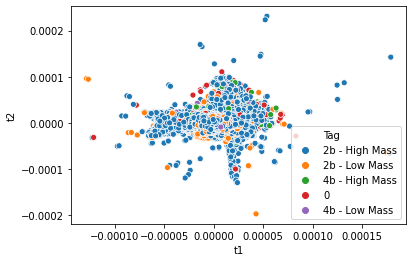

In [46]:
sns.scatterplot(x='t1', y='t2', hue='Tag', data=df_cr)

In [47]:
df_cr_2b4b = df_cr.loc[(df_cr['ntag']==2) | (df_cr['ntag']>=4)]

In [50]:
df_cr_2b4b.reset_index(drop=True, inplace = True)

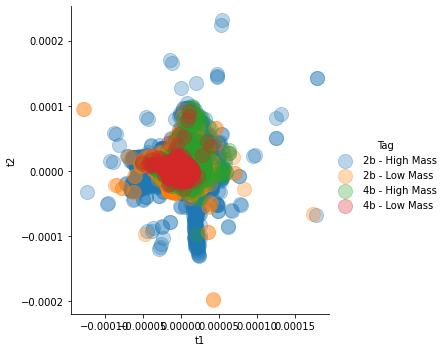

In [52]:
sns.lmplot(
    x="t1",
    y="t2",
    data=df_cr_2b4b,
    fit_reg=False,
    legend=True,
    hue="Tag",
    scatter_kws={"s": 200, "alpha": 0.3},
)

In [63]:
def plot_tsne(
    tsne_df: pd.DataFrame,
    colors = None,
    markers= None,
    sizes= 100,
    hue_column: str = "class",
    size: float = 10,
    aspect: float = 1,
    show_ticks: bool = False,
    style: str = "whitegrid",
    font_scale: float = 1.4,
    legend_font_scale: float = 20,
) -> sns.FacetGrid:
    sns.set(font_scale=font_scale)
    sns.set_style(style)
    if markers is None:  # setting markers=None results in no markers
        plot = sns.lmplot(
            "t1",
            "t2",
            tsne_df,
            hue=hue_column,
            fit_reg=False,
            height=10,
            aspect=1,
            palette=colors,
            scatter_kws={"s": sizes},
        )
    else:
        plot = sns.lmplot(
            "t1",
            "t2",
            tsne_df,
            hue=hue_column,
            fit_reg=False,
            height=10,
            aspect=1,
            palette=colors,
            markers=markers,
            scatter_kws={"s": sizes},
        )
    if not show_ticks:
        plot.ax.set_xticks([])
        plot.ax.set_yticks([])
    legend = plot.fig.legends[0]
    legend.prop.set_size(legend_font_scale)
    legend.set_title(None)
    return plot

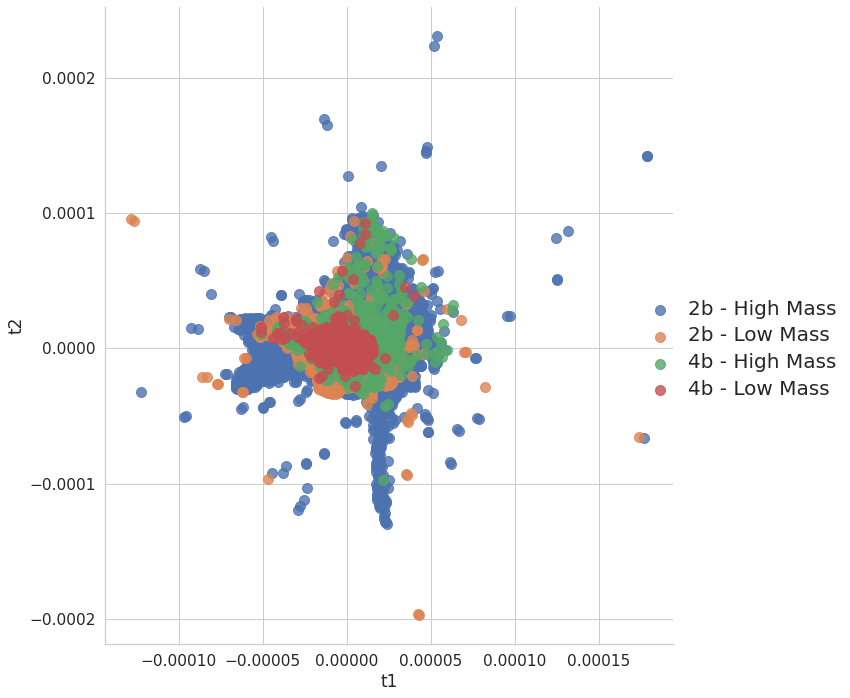

In [64]:
plot_tsne(df_cr_2b4b, hue_column='Tag', show_ticks=True)

In [96]:
t1_mask = (df_cr_2b4b["t1"] >= -0.0001) & (df_cr_2b4b["t1"] < -0.00003)

In [97]:
t2_mask = (df_cr_2b4b['t2'] <= -0.0000)

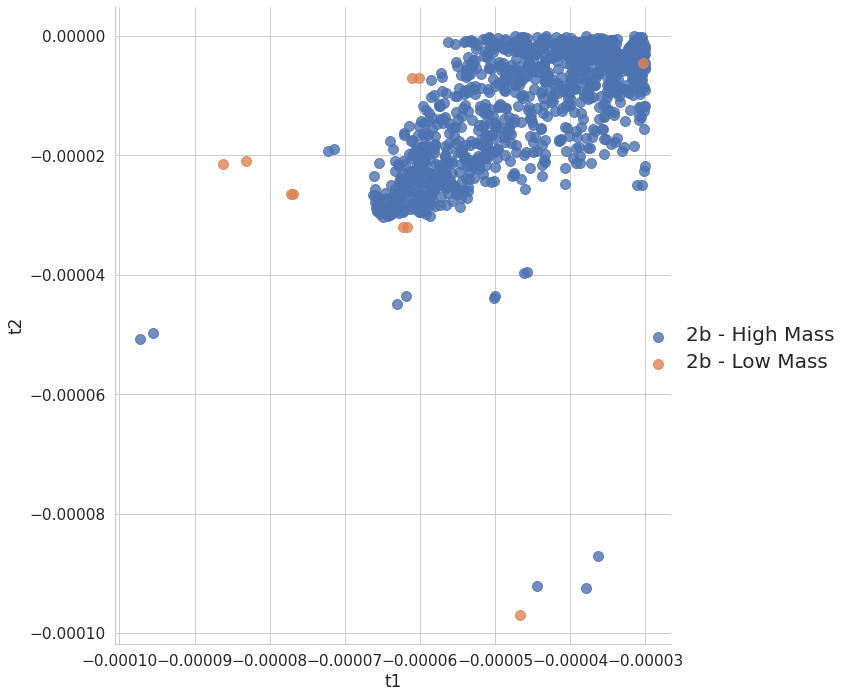

In [98]:
plot_tsne(df_cr_2b4b.loc[t1_mask & t2_mask], hue_column='Tag', show_ticks=True)

In [99]:
df_cr_2b4b.loc[t1_mask & t2_mask, 'njets'].value_counts()

4     381
5     348
6     229
7      78
8      23
9       5
10      1
Name: njets, dtype: int64

In [100]:
df_cr_2b4b.loc[t1_mask & t2_mask, 'ntag'].value_counts()

2    1065
Name: ntag, dtype: int64

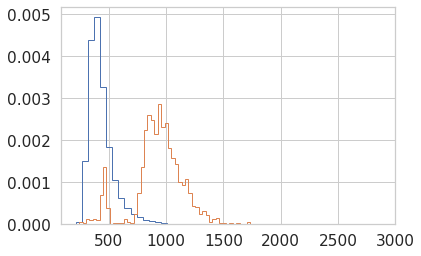

In [102]:
df_cr_2b4b["m_hh"].hist(bins=50, histtype="step", density=True)
df_cr_2b4b.loc[t1_mask & t2_mask, "m_hh"].hist(bins=50, density=True, histtype="step")


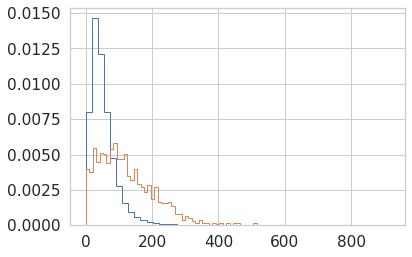

In [103]:
df_cr_2b4b["pt_hh"].hist(bins=50, histtype="step", density=True)
df_cr_2b4b.loc[t1_mask & t2_mask, "pt_hh"].hist(bins=50, density=True, histtype="step")


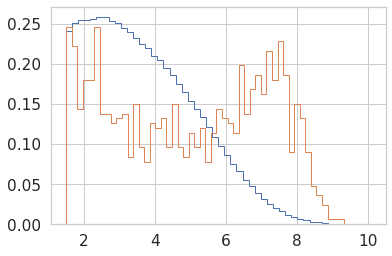

In [104]:
df_cr_2b4b["X_wt_tag"].hist(bins=50, histtype="step", density=True)
df_cr_2b4b.loc[t1_mask & t2_mask, "X_wt_tag"].hist(bins=50, density=True, histtype="step")


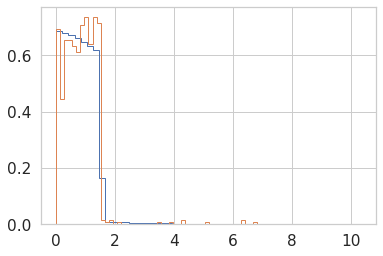

In [105]:
df_cr_2b4b["dEta_hh"].hist(bins=50, histtype="step", density=True)
df_cr_2b4b.loc[t1_mask & t2_mask, "dEta_hh"].hist(bins=50, density=True, histtype="step")
